# Libraries

In [5]:
import pandas as pd
import requests
from missingno import matrix
import io
import streamlit as st

## No row & column limit

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data import

In [9]:
# Base url with API endpoint
BASE_URL = "https://data.sonomacounty.ca.gov/resource/924a-vesw.csv" # This is a csv file

## JSON Import

In [12]:
# Parameters
BATCH_SIZE = 1000
offset = 0
all_data = []

while True:
    params = {
        "$limit": BATCH_SIZE,
        "$offset": offset
    }
    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()
    batch = response.json()
    if not batch:
        break
    all_data.extend(batch)
    offset += BATCH_SIZE
    print(f"Fetched {offset} records...")

# Convert to DataFrame
df = pd.DataFrame(all_data)
print(f"Total records fetched: {len(df)}")

JSONDecodeError: Extra data: line 1 column 7 (char 6)

## CSV Import

In [16]:
BATCH_SIZE = 1000
offset = 0
dfs = []

while True:
    params = {
        "$limit": BATCH_SIZE,
        "$offset": offset
    }
    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()
    # If the response is empty, break
    if not response.text.strip():
        break
    batch_df = pd.read_csv(io.StringIO(response.text))
    if batch_df.empty:
        break
    dfs.append(batch_df)
    offset += BATCH_SIZE
    print(f"Fetched {offset} records...")

# Concatenate all batches
df = pd.concat(dfs, ignore_index=True)
print(f"Total records fetched: {len(df)}")

Fetched 1000 records...
Fetched 2000 records...
Fetched 3000 records...
Fetched 4000 records...
Fetched 5000 records...
Fetched 6000 records...
Fetched 7000 records...
Fetched 8000 records...
Fetched 9000 records...
Fetched 10000 records...
Fetched 11000 records...
Fetched 12000 records...
Fetched 13000 records...
Fetched 14000 records...
Fetched 15000 records...
Fetched 16000 records...
Fetched 17000 records...
Fetched 18000 records...
Fetched 19000 records...
Fetched 20000 records...
Fetched 21000 records...
Fetched 22000 records...
Fetched 23000 records...
Fetched 24000 records...
Fetched 25000 records...
Fetched 26000 records...
Fetched 27000 records...
Fetched 28000 records...
Fetched 29000 records...
Fetched 30000 records...
Fetched 31000 records...
Total records fetched: 30727


## Rest

In [17]:
df.head()

,name,type,breed,color,sex,size,date_of_birth,impound_number,kennel_number,id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,zip_code,location,intake_total
0,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,K24-047892,EUTH,A425283,2024-03-16T00:00:00.000,2024-03-24T00:00:00.000,8,QUARANTINE,OVER THE COUNTER,TRANSFER,LAB FRA,UNKNOWN,DEAD,COUNTY,NaN,NaN,NaN,1
1,NaN,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,NaN,K23-046984,DA21,A422697,2023-12-04T00:00:00.000,2024-01-08T00:00:00.000,35,STRAY,FLD_STRAY,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
2,PINTO,DOG,PIT BULL,BR BRINDLE/WHITE,Neutered,LARGE,2016-07-27T00:00:00.000,K19-032986,DA35,A389457,2019-07-16T00:00:00.000,2019-08-30T00:00:00.000,45,STRAY,FIELD,TRANSFER,HSSC,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"\n, 95407\n(38.4127094, -122.7412153)",1
3,MAISEY,DOG,GERM SHEPHERD,BROWN/BLACK,Spayed,MED,2023-12-05T00:00:00.000,K24-047525,DA38,A424242,2024-02-05T00:00:00.000,2024-03-23T00:00:00.000,47,STRAY,FIELD,ADOPTION,OTH_MEDIA,UNKNOWN,HEALTHY,SANTA ROSA,COUNTY,95403.0,"\n, 95403\n(38.51311, -122.75502)",1
4,WILLIE NYA,DOG,AMERICAN STAFF/MIX,BLACK/WHITE,Spayed,MED,2023-07-31T00:00:00.000,K25-051056,DA01,A431713,2025-01-31T00:00:00.000,2025-03-29T00:00:00.000,57,STRAY,FIELD,ADOPTION,FINDER,UNKNOWN,PENDING,SANTA ROSA,COUNTY,95401.0,"\n, 95401\n(38.45663, -122.72292)",1


# EDA

## Missing values

<Axes: >

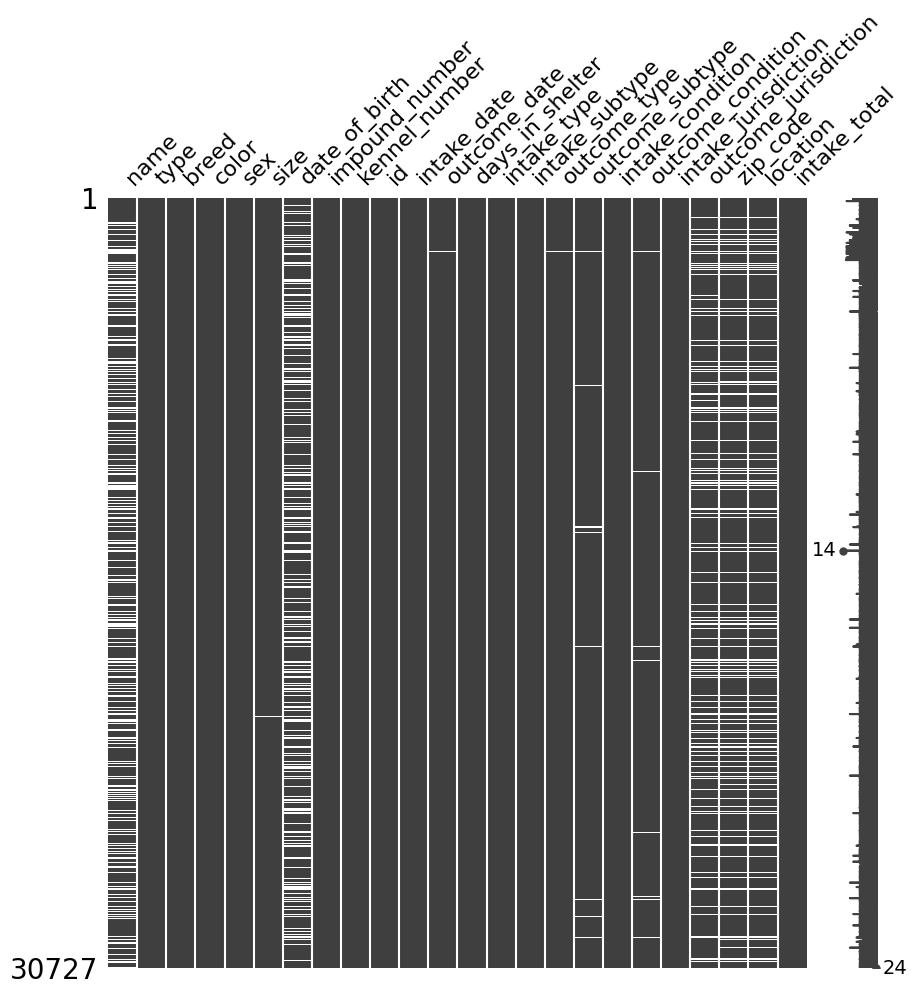

In [18]:
matrix(df, figsize=(10, 10))

In [19]:
# Number of missing values as percentage
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_percentage

name                    26.390471
type                     0.000000
breed                    0.000000
color                    0.000000
sex                      0.000000
size                     0.117161
date_of_birth           24.301103
impound_number           0.000000
kennel_number            0.026036
id                       0.000000
intake_date              0.000000
outcome_date             0.602076
days_in_shelter          0.000000
intake_type              0.000000
intake_subtype           0.000000
outcome_type             0.618349
outcome_subtype          1.724867
intake_condition         0.000000
outcome_condition        1.796466
intake_jurisdiction      0.000000
outcome_jurisdiction    14.632083
zip_code                14.589774
location                14.589774
intake_total             0.000000
dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30727 entries, 0 to 30726
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  22618 non-null  object 
 1   type                  30727 non-null  object 
 2   breed                 30727 non-null  object 
 3   color                 30727 non-null  object 
 4   sex                   30727 non-null  object 
 5   size                  30691 non-null  object 
 6   date_of_birth         23260 non-null  object 
 7   impound_number        30727 non-null  object 
 8   kennel_number         30719 non-null  object 
 9   id                    30727 non-null  object 
 10  intake_date           30727 non-null  object 
 11  outcome_date          30542 non-null  object 
 12  days_in_shelter       30727 non-null  int64  
 13  intake_type           30727 non-null  object 
 14  intake_subtype        30727 non-null  object 
 15  outcome_type       